# Model Building

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
from sklearn.model_selection import cross_val_score , train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import feature_selection as fs
import numpy.random as nr

In [6]:
data = pd.read_csv(r'data_cleaned.csv')
data.head()

,country,year,cereal_yield,fdi_perc_gdp,en_per_gdp,en_per_cap,co2_ttl,co2_per_cap,co2_per_gdp,pop_urb_aggl_perc,prot_area_perc,gdp,gni_per_cap,under_5_mort_rate,pop_growth_perc,pop,urb_pop_growth_perc,urb_pop
0,AGO,1991,417.4,5.449515,179.271884,565.451027,4367.397,0.409949,129.971142,15.290728,12.399822,1.219375e+10,820.0,239.1,3.034866,10653515.0,6.687032,4099472.572
1,AGO,1992,397.0,4.982460,193.632183,550.548264,4418.735,0.401597,141.244823,15.660630,12.399823,5.779394e+09,470.0,235.3,3.226990,11002910.0,6.750459,4385759.926
2,AGO,1993,267.8,5.715529,266.318379,551.688878,5801.194,0.510141,246.261769,16.025739,12.399823,5.285600e+09,310.0,231.1,3.297243,11371750.0,6.700777,4689709.700
3,AGO,1994,298.4,4.195018,260.830190,541.553067,3890.687,0.331321,159.575256,16.065941,12.399824,4.059577e+09,190.0,226.3,3.212170,11742960.0,6.503667,5004849.552
4,AGO,1995,402.2,9.374417,237.623934,528.386164,11012.001,0.909699,409.106543,16.134424,12.399825,5.039535e+09,320.0,221.5,3.037335,12105105.0,6.223936,5326246.200


In [8]:
#define a random state number for all random state-ensures reproductivity od all results
random_state_num = 0

In [10]:
data.shape

(1700, 18)

In [12]:
data.dtypes

country                 object
year                     int64
cereal_yield           float64
fdi_perc_gdp           float64
en_per_gdp             float64
en_per_cap             float64
co2_ttl                float64
co2_per_cap            float64
co2_per_gdp            float64
pop_urb_aggl_perc      float64
prot_area_perc         float64
gdp                    float64
gni_per_cap            float64
under_5_mort_rate      float64
pop_growth_perc        float64
pop                    float64
urb_pop_growth_perc    float64
urb_pop                float64
dtype: object

In [14]:
#dealing with outliers

In [16]:
#remove the ARE outliers
data=data[data['country']!='ARE']

print("Shape of the dataset after removing the ARE outliers:")
data.shape

Shape of the dataset after removing the ARE outliers:


(1686, 18)

In [18]:
#selection of dependent and independent variables

In [26]:
#features are independent variables and target are dependent

In [34]:
#choose features and label columns
feature_cols = ['cereal_yield','fdi_perc_gdp','gni_per_cap','en_per_cap',
                'pop_urb_aggl_perc','prot_area_perc','pop_growth_perc','urb_pop_growth_perc']
label_col = ['co2_per_cap']


In [36]:
#convert into numpy arrayes (required for scikit-learn models)
features = np.array(data[feature_cols])
labels = np.array(data[label_col])

In [38]:
features

array([[ 417.4       ,    5.44951458,  820.        , ...,   12.39982205,
           3.03486601,    6.68703163],
       [ 397.        ,    4.98245985,  470.        , ...,   12.39982269,
           3.22698986,    6.75045876],
       [ 267.8       ,    5.71552893,  310.        , ...,   12.39982333,
           3.29724265,    6.70077708],
       ...,
       [1816.1       ,    5.7538601 ,  620.        , ...,   35.98301766,
           2.47931167,    2.8785138 ],
       [1907.9       ,   11.47085026,  750.        , ...,   35.98301766,
           2.56491884,    2.96253368],
       [2144.        ,    6.41099075,  970.        , ...,   35.98301766,
           2.65395608,    3.0499962 ]])

In [42]:
features.ndim  #gives dimension of array

2

In [46]:
#split into training and testing subsets
nr.seed(1)
features_train, features_test, labels_train, labels_test = train_test_split(features,labels,test_size=0.2,random_state=random_state_num)

In [48]:
#feature selection and cross validation

In [50]:
#set folds for cross validation for the feature selection
nr.seed(1)
feature_folds = ms.KFold(n_splits=4,shuffle=True,random_state=random_state_num)

#define the model
rf_selector = RandomForestRegressor(random_state=random_state_num)

In [52]:
#define an object for model for recursive feature elimination with cv
nr.seed(1)
selector= fs.RFECV(estimator= rf_selector,cv=feature_folds, scoring='r2',n_jobs=-1)

selector = selector.fit(features_train, np.ravel(labels_train))

In [58]:
selector.support_
print("Feature ranking after RFECV:")
print(selector.ranking_)

#print the impostant features
ranks_transform = list(np.transpose(selector.ranking_))
chosen_features = [i for i,j in zip(feature_cols, ranks_transform) if j==1]
print("Chosen important features:")
print(chosen_features)

Feature ranking after RFECV:
[1 2 1 1 1 1 1 1]
Chosen important features:
['cereal_yield', 'gni_per_cap', 'en_per_cap', 'pop_urb_aggl_perc', 'prot_area_perc', 'pop_growth_perc', 'urb_pop_growth_perc']


In [60]:
#reduce features
features_train_reduced = selector.transform(features_train)
features_test_reduced = selector.transform(features_test)

print("Training subset shape before the recursive feature elimination:",features_train.shape)
print("Training subset array shape after the recursive feature elimination:",features_train_reduced.shape)
print("Test subset array shape after the recursive feature elimination:",features_test_reduced.shape)



Training subset shape before the recursive feature elimination: (1348, 8)
Training subset array shape after the recursive feature elimination: (1348, 7)
Test subset array shape after the recursive feature elimination: (338, 7)


In [62]:
#define value ranges for each hyperparameter
n_estimators = [int(x) for x in np.linspace(start=200, stop= 2000, num=10)]

#keep the rest unchanged
max_depth = [int(x) for x in np.linspace(10,110,num=11)]
max_depth.append(None)

#create the hyperparameter grid
param_grid={
    'n_estimators':n_estimators,
    'max_features':['sqrt','log2',None],
    'max_depth':max_depth,
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

In [70]:
#define the cross validation folds for the hyperparameter tuning
nr.seed(1)
inside_folds = ms.KFold(n_splits=5, shuffle=True ,random_state=random_state_num)

#define the random forest regressor model object
rf_tuner = RandomForestRegressor(random_state =random_state_num)

#perform a randomized search on the grid
nr.seed(1)
rf_model = ms.RandomizedSearchCV(estimator=rf_tuner , param_distributions=param_grid,
                                 random_state=random_state_num, refit=True,
                                 cv=inside_folds, scoring='r2',return_train_score=True, n_jobs=-1)


In [72]:
#fit the grid search model object with cross_validtaion on the data
rf_model.fit(features_train_reduced, np.ravel(labels_train))

#corrected variable name
print("Best Parameters:",rf_model.best_params_)

Best Parameters: {'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 30}


In [74]:
#pick the model with the best hyperparameter combination for further analysis
rf_best_model = rf_model.best_estimator_

In [78]:
#define the cross validation folds for the evaluation
nr.seed(1)
outside_folds = ms.KFold(n_splits=10, shuffle=True ,random_state=random_state_num)

#evaluate the model on the training subset with cross validation
nr.seed(1)
cv_eval = cross_val_score(rf_best_model, features_train_reduced, labels_train,cv=outside_folds,n_jobs=-1)

In [80]:
print('Mean R2 score of the all CV folds= %4.3f'%np.mean(cv_eval))
print('Standard deviation of thr R2 score over all folds=%4.3f'%np.std(cv_eval))
print('R2 score for each fold:')

#print the R2 score for each fold
for i, j in enumerate(cv_eval):
    print('Fold %d  %4.3f'% (i+1,j))

Mean R2 score of the all CV folds= 0.986
Standard deviation of thr R2 score over all folds=0.003
R2 score for each fold:
Fold 1  0.990
Fold 2  0.990
Fold 3  0.989
Fold 4  0.985
Fold 5  0.980
Fold 6  0.984
Fold 7  0.986
Fold 8  0.987
Fold 9  0.986
Fold 10  0.984


In [82]:
#validate the model on the testing subset

In [90]:
from sklearn.metrics import r2_score, mean_squared_error

In [94]:
#make predictions from the features of the testing subset
predictions = rf_best_model.predict(features_test_reduced)

#calculate the metrics basing on the predicted and true values for the test subset
r2=r2_score(y_true=labels_test, y_pred=predictions)
mse = mean_squared_error(y_true=labels_test, y_pred=predictions)
rmse = np.sqrt(mse)

print(f"R2 = {r2}, Mean Squared Error (MSE)={mse},Root Mean Squared Error(RMSE)={rmse}")

R2 = 0.9858363865936163, Mean Squared Error (MSE)=0.27240641692309403,Root Mean Squared Error(RMSE)=0.5219256814174735


In [96]:
#model evaluation and prediction quality

<function matplotlib.pyplot.show(close=None, block=None)>

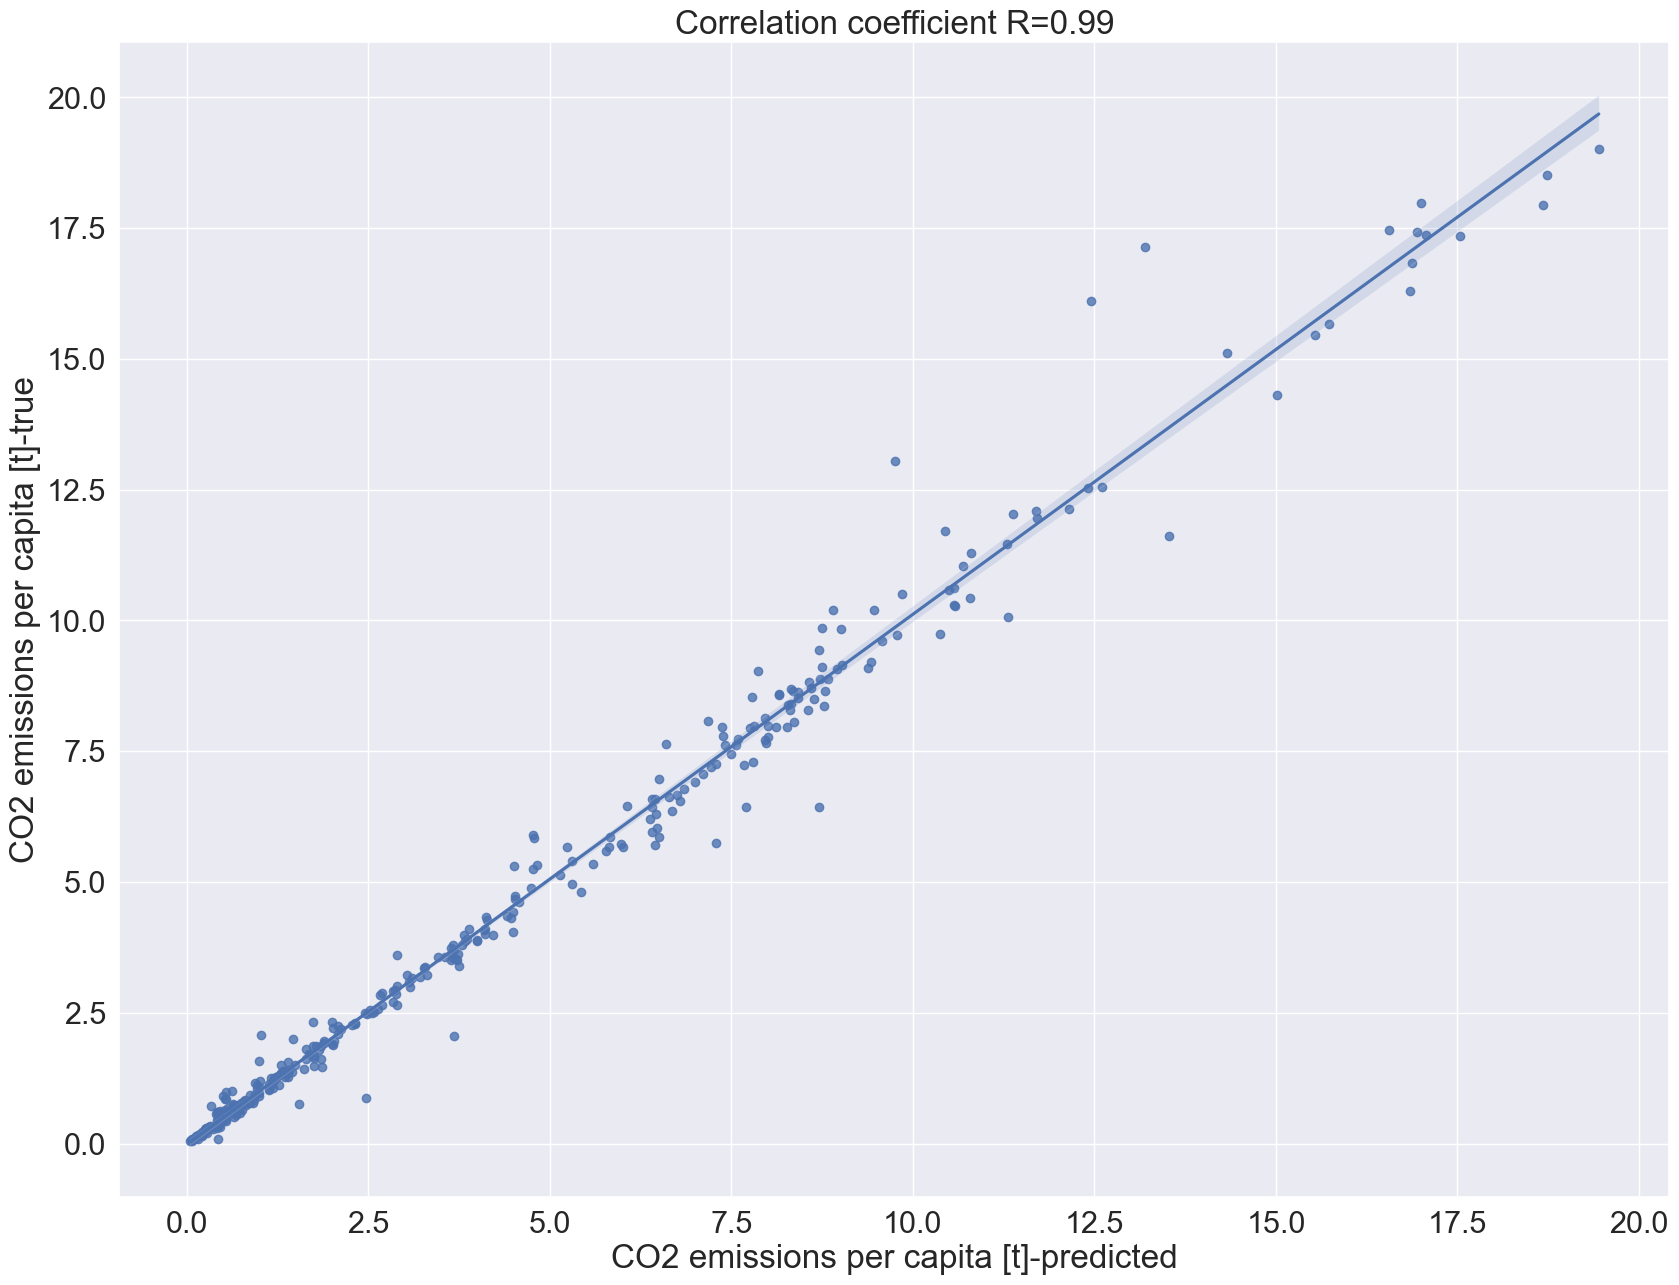

In [100]:
import seaborn as sns
#plot predicted vs true values of the test subset

f,ax=plt.subplots(figsize=(20,15))
sns.set_theme(font_scale=2)

sns.regplot(x=predictions, y=np.transpose(labels_test)[0,:],fit_reg=True)
plt.xlabel("CO2 emissions per capita [t]-predicted")
plt.ylabel("CO2 emissions per capita [t]-true")
plt.title("Correlation coefficient R="+str(round(np.corrcoef(predictions,np.transpose(labels_test)[0,:])[0,1],2)))
plt.show

In [102]:
import joblib

#save the trained model to file
joblib.dump(rf_best_model, 'forecasting_co2_emmision.pkl')
print("Model saved to forecating_co2_emmision")

Model saved to forecating_co2_emmision


In [104]:
#load model from file
loaded_model = joblib.load('forecasting_co2_emmision.pkl')
print("Model loaded successfully.")

Model loaded successfully.


In [106]:
#list of selected features
selected_features = ['cereal_yield','gni_per_cap','en_per_cap',
                     'pop_urb_aggl_perc','prot_area_perc',
                     'pop_growth_perc','urb_pop_growth_perc']

In [108]:
selected_countries = ['IND','USA','PAK','RUS','NZL']

#filter the dataset to include only the selected countries
df_filtered = data[data['country'].isin(selected_countries)]

#dictionary to store the growth rates for each country
growth_rates = {}

#loop over each selected country
for country in selected_countries:
    #get data for the current country and sort it by year
    country_data = data[(data['country']==country)].sort_values('year')

    #identify the start and end year for the country
    start_year = country_data['year'].min()
    end_year = country_data['year'].max()
    years = end_year-start_year #total no. of years between start and end

    #dictionary to store growth rates of all features for the current country
    country_growth = {}

    #skip this country if the time span is not valid(ex. only one year of data)
    if years<= 0:
        print(f"Skipping {country} due to insufficient year range.")
        continue

    #loop through each selected feature
    for feature in selected_features:
        #get the feature value in the start year
        start_value = country_data[country_data['year']==start_year][feature].values
        #get the feature value in the end year
        end_value = country_data[country_data['year']==end_year][feature].values

        #skip if either value is missing
        if len(start_value)==0 or len(end_value) ==0:
            continue

        #extract scalar values from arrays
        start_value = start_value[0]
        end_value = end_value[0]

        #skip if values are non-positive or not finite(ex. NaN, inf)
        if start_value<=0 or end_value<=0 or not np.isfinite(start_value) or not np.isfinite(end_value):
            continue

        #compute the Compound Annual Growth Rate(CAGR)
        cagr = (end_value/start_value)**(1/years)-1
        #store the result in the country-specific dictionary
        country_growth[feature]=cagr

    #save the growth rates of all features for the current country
    growth_rates[country] = country_growth

In [110]:
#display the calculated growth rates in a readable format
print("\nGrowth Rates (CAGR) from {} to {}:\n".format(start_year, end_year))

#loop through each country and its corresponding growth rate dictionary
for country, features in growth_rates.items():
    print(f"{country}") #print the country name with icon

    #loop through each feature and its CAGR value
    for feature, rate in features.items():
        #determine whether to display a plus or minus sign
        sign = '+' if rate>=0 else '-'

        #print the feature name and its growth rate percentage (formatted to two decimal places)
        print(f"  .{feature}:{sign}{abs(rate*100):.2f}%")

    #add a line break between countries for readability
    print()


Growth Rates (CAGR) from 1991 to 2008:

IND
  .cereal_yield:+1.94%
  .gni_per_cap:+6.85%
  .en_per_cap:+2.12%
  .pop_urb_aggl_perc:+1.26%
  .prot_area_perc:+0.35%
  .pop_growth_perc:-2.28%
  .urb_pop_growth_perc:-1.26%

USA
  .cereal_yield:+2.28%
  .gni_per_cap:+4.26%
  .en_per_cap:-0.12%
  .pop_urb_aggl_perc:+0.40%
  .prot_area_perc:+0.01%
  .pop_growth_perc:-2.16%
  .urb_pop_growth_perc:-2.15%

PAK
  .cereal_yield:+2.29%
  .gni_per_cap:+5.00%
  .en_per_cap:+1.50%
  .pop_urb_aggl_perc:+0.84%
  .prot_area_perc:+0.01%
  .pop_growth_perc:-2.46%
  .urb_pop_growth_perc:-1.01%

RUS
  .cereal_yield:+1.99%
  .gni_per_cap:+7.41%
  .en_per_cap:-0.61%
  .pop_urb_aggl_perc:+0.48%
  .prot_area_perc:+0.46%

NZL
  .cereal_yield:+1.96%
  .gni_per_cap:+5.00%
  .en_per_cap:+0.39%
  .pop_urb_aggl_perc:+1.15%
  .prot_area_perc:+0.17%
  .pop_growth_perc:-2.04%
  .urb_pop_growth_perc:-1.83%



In [112]:
#define the range of years to forecast(next 20 years beyond the last available year)
last_year = data['year'].max()
future_years = list(range(last_year +1 , last_year+21))

In [114]:
#initialize a list to store forecated results
forecast_result = []

#loop through each selected country for prediction
for country in selected_countries:
    country_data = data[(data['country']==country)].sort_values('year')

    #skip countries with missing feature values
    if country_data[selected_features].dropna().empty:
        print(f"Skipping {country} due to missing values.")
        continue

    #take the latest complete record (most recent year) for the country
    latest_row = country_data[selected_features].dropna().iloc[-1].copy()

    #forecast for each year into the feature
    for year in future_years:
        #apply the previously calculated CAGR to each feature
        for feature in selected_features:
            growth_rate = growth_rates.get(country, {}).get(feature,0.0)
            latest_row[feature] *=(1+growth_rate)

        #use trained model to predict CO2 emissions per capita
        input_features = latest_row.values.reshape(1,-1)
        predicted_co2 = loaded_model.predict(input_features)[0]

        #store the forecast result
        forecast_result.append({
            'country':country,
            'year':year,
            'co2_percap':predicted_co2
        })
        

Firecasted CO2 Emissions per capita (Next 20 years)


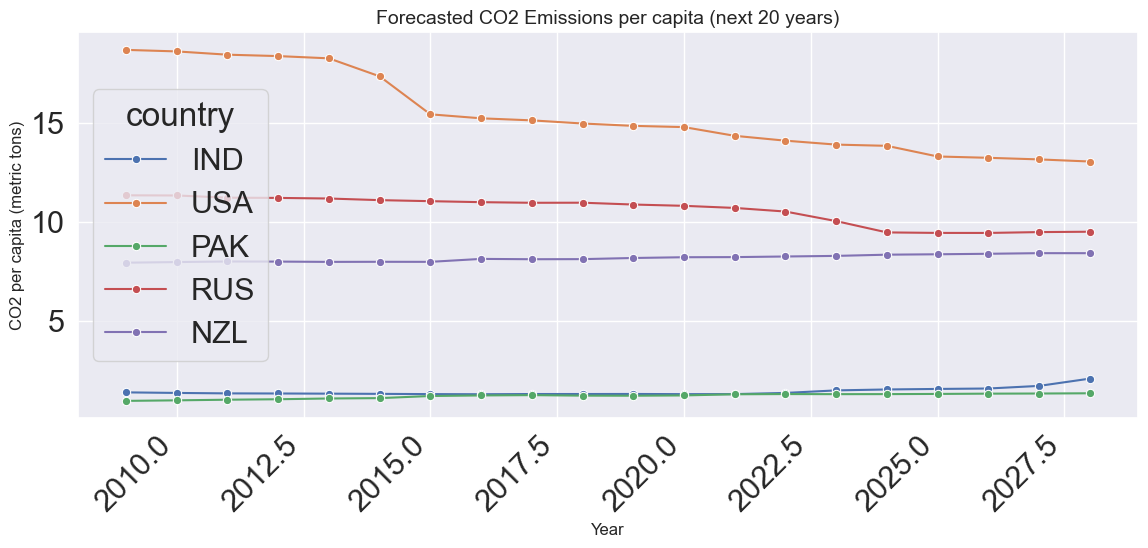

In [118]:
#convert the list of predictions into a dataframe
df_forecast = pd.DataFrame(forecast_result)

#plot forecasted CO2 per capitafor all countries over the next 20 years
print("Firecasted CO2 Emissions per capita (Next 20 years)")
plt.figure(figsize=(12,6))
sns.lineplot(data=df_forecast, x='year',y='co2_percap',hue='country',marker='o')
plt.title('Forecasted CO2 Emissions per capita (next 20 years)',fontsize=14)
plt.xlabel('Year',fontsize=12)
plt.ylabel('CO2 per capita (metric tons)',fontsize=12)
plt.xticks(rotation=45,ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [120]:
print(df_forecast[df_forecast['country']=='IND'].sort_values(by='year').tail(5))

   country  year  co2_percap
15     IND  2024    1.538156
16     IND  2025    1.564411
17     IND  2026    1.586332
18     IND  2027    1.717992
19     IND  2028    2.084860
